In [96]:
import pandas as pd

In [97]:
df = pd.read_csv('../data/raw/Hotel_Reservations.csv')

In [98]:
df.shape

(36275, 19)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [102]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [103]:
# booking ID has no predictive significance
df.drop(columns='Booking_ID',inplace=True)

In [104]:
df.describe() # We should check for outliers, deviation, and averages to decide where we need to transform our data further.

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [105]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

#### Now we look at categorical columns and consider how to encode them:

In [106]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [107]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

#### With 7 categories, 3 of which are very low cardinality (Room_Type 5,7 and 3) and could be considered an 'Other' category.

In [108]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

#### Same as above, low cardinality categories could be 'Other'.

In [109]:
df['booking_status'].value_counts() # this is our target

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [110]:
# ratio of cancelled to not cancelled:
canc = df[df['booking_status']=='Not_Canceled']
non_canc = df[df['booking_status']!='Not_Canceled']

ratio_canc = (canc.shape[0]) / (df.shape[0])
ratio_non_canc = 1 - ratio_canc 

print(f"Percent of non cancelled:{ratio_non_canc*100:.2f}%, Percent of cancelled:{ratio_canc*100:.2f}%")

Percent of non cancelled:32.76%, Percent of cancelled:67.24%



### => Our data is imbalanced, but not extremely so. It might not be necessary to synethetically make more samples if we choose the right features & models.

In [111]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

### EDA:

* **Univariate Analysis:**

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def num_plot_dist(df, num_cols):
    n_cols = 4  # number of plots per row
    n_rows = math.ceil(len(num_cols) / n_cols)  # calculate rows needed
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
    
    # Flatten axes array for easy indexing
    axes = axes.flatten() if len(num_cols) > 1 else [axes]

    for i, col in enumerate(num_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
        axes[i].set_title(f"Distribution of {col}")

    # Turn off any unused subplots
    for j in range(len(num_cols), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


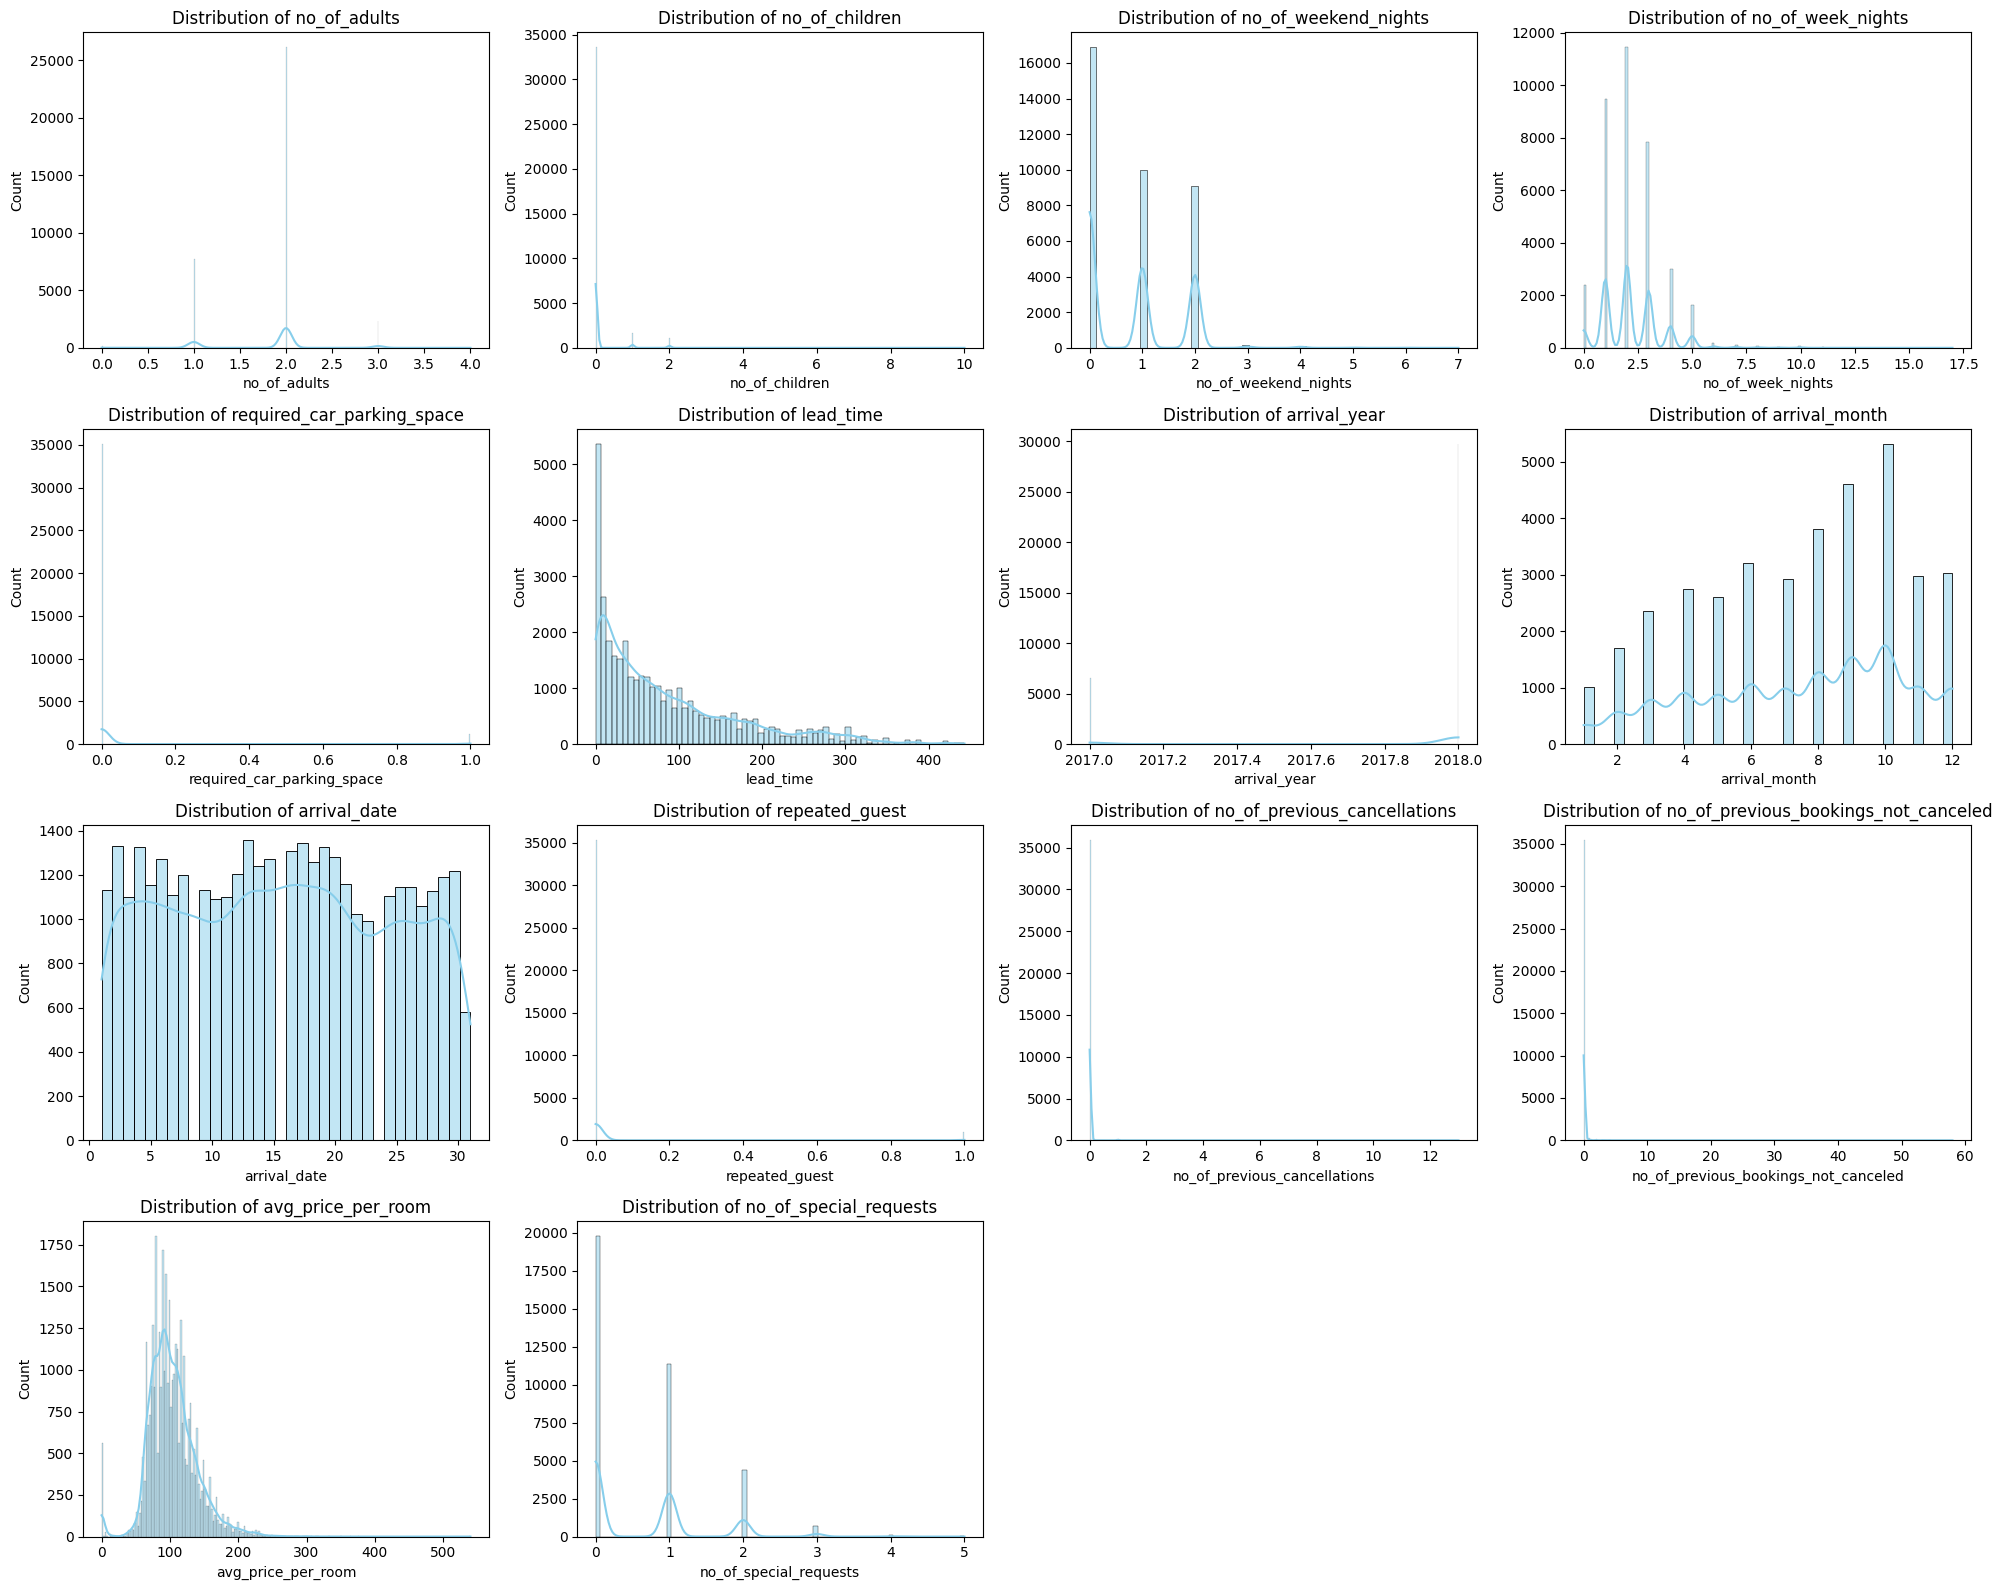

In [113]:
num_plot_dist(df, num_cols)

### Skewed columns will need a log trasnformation applied to them.

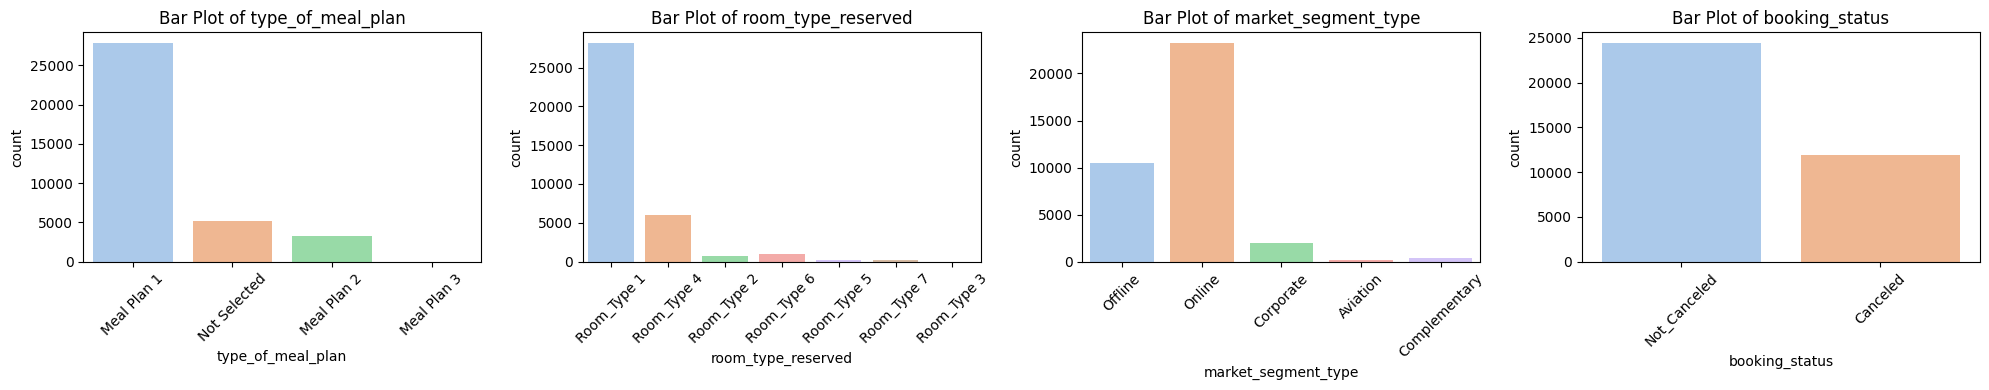

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def cat_plot_counts(df, cat_cols):
    n_cols = 4  
    n_rows = math.ceil(len(cat_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))

    axes = axes.flatten() if len(cat_cols) > 1 else [axes]

    for i, col in enumerate(cat_cols):
        sns.countplot(data=df, x=col, ax=axes[i], palette="pastel", hue=col, legend=False)
        axes[i].set_title(f"Bar Plot of {col}")
        axes[i].tick_params(axis='x', rotation=45)  

    for j in range(len(cat_cols), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

cat_plot_counts(df, cat_cols)

* **Bivariate Analysis**

C:\Users\User\AppData\Local\Temp\ipykernel_18416\2987776194.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
C:\Users\User\AppData\Local\Temp\ipykernel_18416\2987776194.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
C:\Users\User\AppData\Local\Temp\ipykernel_18416\2987776194.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
C:\Users\User\AppData\Local\Temp\ipyk

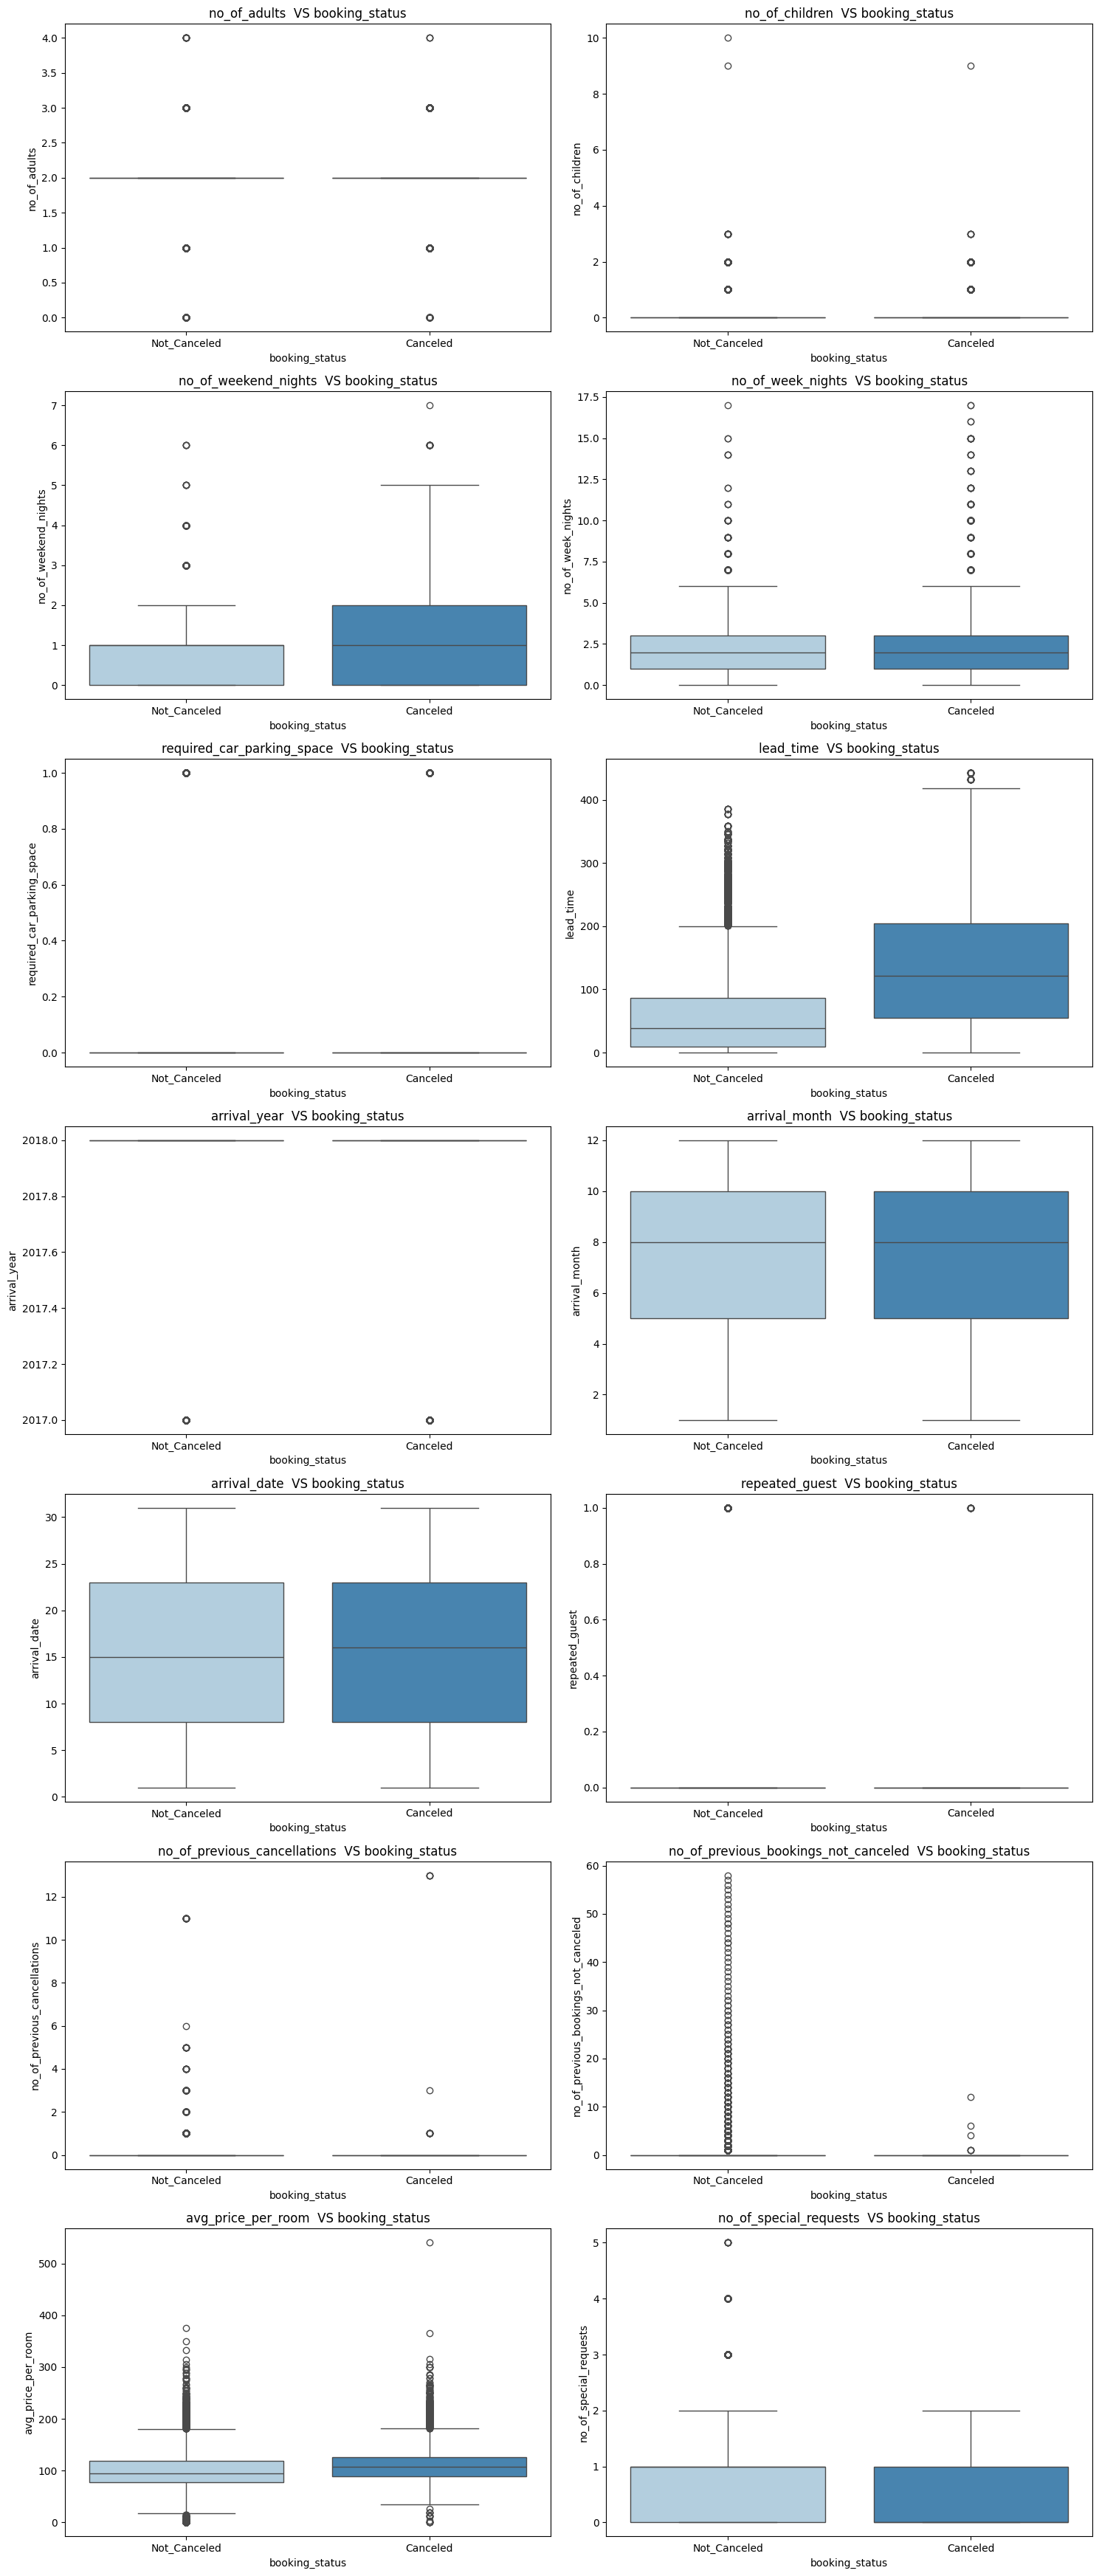

In [115]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

plot_bivariate_num(df , 'booking_status' , num_cols)

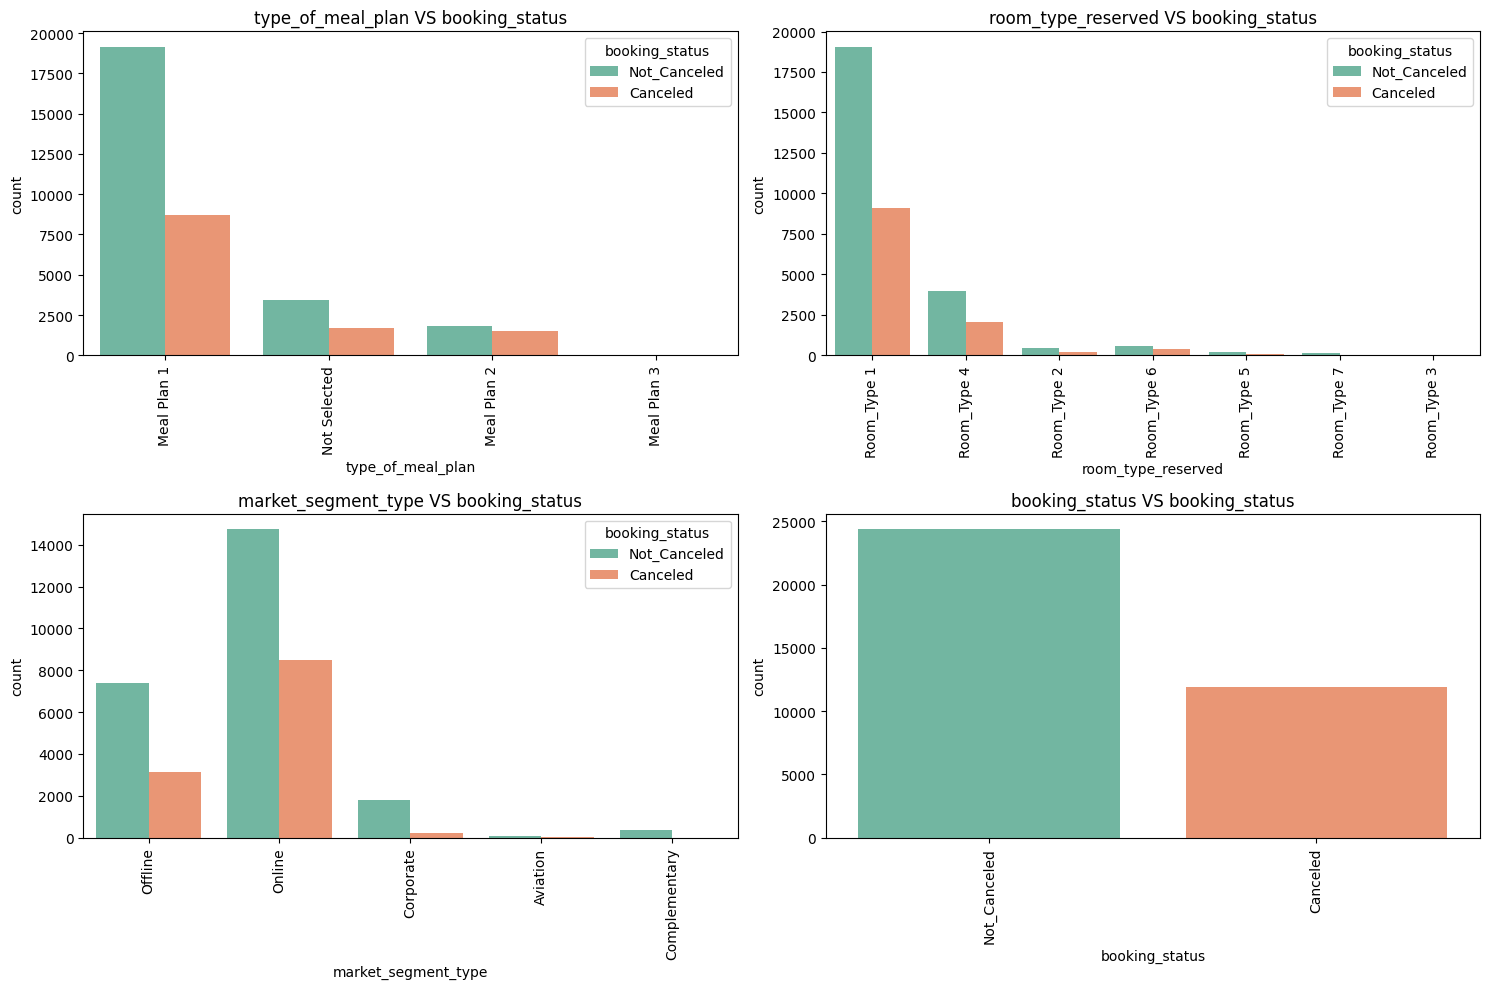

In [116]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

plot_bivaraite_cat(df, 'booking_status', cat_cols)

### Data Processing:

#### We need to prepare our data at this stage. OHE categorical columns, and log transform where needed:

In [117]:
corr = df[num_cols].corr()

<Axes: >

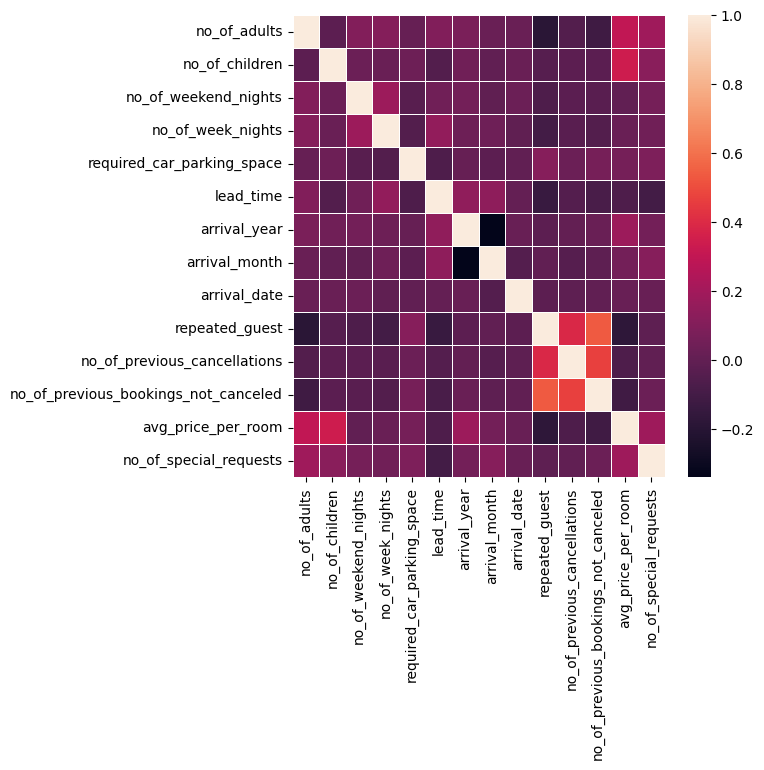

In [118]:
plt.figure(figsize=(6,6))
sns.heatmap(corr , linewidths=0.5)

In [119]:
skewness  = df[num_cols].skew()
skewness

no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
required_car_parking_space               5.413643
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
repeated_guest                           6.002888
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
dtype: float64

### No columns have significant negative skew, so our only issue  arises with high positive skew making Log transformations the best approach.

In [120]:
import numpy as np
for col in num_cols:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [121]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [122]:
y

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object

In [123]:
target_map = {
    'Not_Canceled':0,
    'Canceled':1,
}
y.replace(target_map, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18416\1230664750.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(target_map, inplace=True)


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, stratify=y)

In [125]:
print(f"X_Train: {X_train.shape[0]} rows, {X_train.shape[1]} columns")
print(f"X_test: {X_test.shape[0]} rows, {X_test.shape[1]} columns")

X_Train: 25392 rows, 17 columns
X_test: 10883 rows, 17 columns


In [ ]:
top_categories = ["Meal Plan 1", "Not Selected", "Meal Plan 2"]

for cat in top_categories:
    df[f"meal_{cat.replace(' ', '_').lower()}"] = (
        df["type_of_meal_plan"] == cat
    ).astype(int)

In [135]:
threshold = 500

counts = df['market_segment_type'].value_counts()
low_cardinality_seg = counts[counts < threshold].index
df['market_segment_type'] = df['market_segment_type'].where(
    ~df['market_segment_type'].isin(low_cardinality_seg),
    'Other'
)

counts = df['room_type_reserved'].value_counts()
low_cardinality_room_types = counts[counts < threshold].index
df['room_type_reserved'] = df['room_type_reserved'].where(
    ~df['room_type_reserved'].isin(low_cardinality_room_types),
    'Other'
)


In [137]:
df['market_segment_type'].value_counts()

market_segment_type
Online       23214
Offline      10528
Corporate     2017
Other          516
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=True, handle_unknown='ignore', drop='first')
X_encoded = ohe.fit_transform(df[cat_cols])

feature_names = ohe.get_feature_names_out(cat_cols)

df_encoded = pd.DataFrame(X_encoded.toarray(), columns=feature_names)

df = pd.concat([df.drop(cat_cols, axis=1), df_encoded], axis=1)

In [83]:
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'Meal Plan 2'

In [33]:
feature_importance = model.feature_importances_

In [34]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [35]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [36]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [ ]:
top_10_df

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,224,65.000000,0,10,2,3,2,1,2017,2,1
1,5,106.680000,1,11,6,4,3,2,2018,2,1
2,1,60.000000,0,2,28,4,1,2,2018,1,0
3,211,100.000000,0,5,20,4,2,0,2018,2,0
4,48,94.500000,0,4,11,4,1,1,2018,2,0
...,...,...,...,...,...,...,...,...,...,...,...
48775,265,115.000000,1,6,24,4,2,0,2018,2,0
48776,68,77.394578,0,6,22,3,4,2,2017,1,0
48777,219,140.286918,1,9,13,4,2,0,2018,2,0
48778,230,137.000000,0,9,6,3,5,0,2018,2,0


In [38]:
df = top_10_df.copy()

### Model Selection:

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

X = df.drop(columns='booking_status')
y = df["booking_status"]


classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

metrics_df= pd.DataFrame(metrics)

c:\Users\User\Documents\MLOPS_UDEMY\hotel_res\my_work\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 19518, number of negative: 19506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 39024, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500154 -> initscore=0.000615
[LightGBM] [Info] Start training from score 0.000615


In [40]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.918102,0.910171,0.927545,0.918776
1,LogisticRegression,0.792025,0.791112,0.792898,0.792004
2,Gradient Boosting,0.835691,0.830135,0.843596,0.836812
3,Suuport vector classifier,0.686859,0.654376,0.790435,0.715999
4,Decsion Tree,0.885199,0.892962,0.875000,0.883890
5,KNN,0.830361,0.856889,0.792693,0.823542
6,Naive Bayes,0.755740,0.772260,0.724548,0.747644
7,XGboost,0.896064,0.885800,0.909072,0.897285
8,Adaboost,0.776855,0.763132,0.802135,0.782148
9,LGBM,0.884174,0.867728,0.906199,0.886546


In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = df.drop(columns='booking_status')
y = df["booking_status"]

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

rf = RandomForestClassifier(random_state=42)

params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.3s
[CV]

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'max_depth': <scipy.stats....001C429AEC690>, 'min_samples_leaf': <scipy.stats....001C429A2D5B0>, 'min_samples_split': <scipy.stats....001C429BB2FD0>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",5
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the var

In [42]:
best_rf_model = random_search.best_estimator_

In [43]:
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f"Accuracy:{accuracy}, Precision:{precision}, Recall {recall}, F1 score {f1}")

Accuracy:0.9141041410414105, Precision:0.9037229783827062, Recall 0.9267241379310345, F1 score 0.9150790433725172


In [45]:
import joblib
import os

folder_path = '../artifacts/'
filename = os.path.join(folder_path, 'random_forest.pkl')

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

joblib.dump(best_rf_model, filename)


['../artifacts/random_forest.pkl']